In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
flights_data = pd.read_csv('data/Flights/flights2022.csv')
weather_data = pd.read_csv('data/Flights/flights_weather2022.csv')

flights_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111371,2022,6,30,NaN,1155,NaN,NaN,2033,NaN,UA,206,NaN,SEA,EWR,NaN,2402,11,55,2022-06-30T11:00:00Z,United Air Lines Inc.
111372,2022,6,30,NaN,1448,NaN,NaN,1732,NaN,DL,323,N3759,SEA,LAX,NaN,954,14,48,2022-06-30T14:00:00Z,Delta Air Lines Inc.
111373,2022,6,30,NaN,1751,NaN,NaN,2352,NaN,DL,377,N898DN,SEA,ORD,NaN,1721,17,51,2022-06-30T17:00:00Z,Delta Air Lines Inc.
111374,2022,6,30,NaN,1145,NaN,NaN,2029,NaN,DL,114,N876DN,SEA,JFK,NaN,2422,11,45,2022-06-30T11:00:00Z,Delta Air Lines Inc.


In [12]:
# ---- Busiest Routes Analysis ----
# Group by origin and destination
busiest_routes = flights_data.groupby(['origin', 'dest']).size().reset_index(name='flight_count')
busiest_routes = busiest_routes.sort_values(by='flight_count', ascending=False).head(10)

busiest_routes

,origin,dest,flight_count
46,PDX,SEA,3877
121,SEA,PDX,3870
58,SEA,ANC,3362
103,SEA,LAX,3318
137,SEA,SFO,3253
87,SEA,GEG,3100
102,SEA,LAS,3082
123,SEA,PHX,3036
76,SEA,DEN,2927
139,SEA,SJC,2360


In [16]:
# ---- Peak Periods Analysis ----
# Aggregate flights by month
flights_by_month = flights_data.groupby('month').size().reset_index(name='flight_count')
# Aggregate flights by hour
flights_by_hour = flights_data.groupby('hour').size().reset_index(name='flight_count')

flights_by_hour

,hour,flight_count
0,0,796
1,1,18
2,5,2919
3,6,5987
4,7,9134
5,8,7518
6,9,8443
7,10,6091
8,11,8991
9,12,5037


In [17]:
# ---- Delay Analysis ----
# Calculate average delay by airline
average_delays = flights_data.groupby('airline')['arr_delay'].mean().reset_index()
average_delays = average_delays.sort_values(by='arr_delay', ascending=False)

average_delays

,airline,arr_delay
7,JetBlue Airways,31.417188
1,Allegiant Air,22.119565
4,Frontier Airlines Inc.,11.051802
2,American Airlines Inc.,8.998606
10,Spirit Air Lines,5.578182
5,Hawaiian Airlines Inc.,4.591160
6,Horizon Air,4.192191
9,Southwest Airlines Co.,2.995841
0,Alaska Airlines Inc.,2.633175
3,Delta Air Lines Inc.,0.913329


In [18]:
# ---- Weather Impact Analysis ----
# Pre-aggregate weather data by origin and day
weather_aggregated = weather_data.groupby(['year', 'month', 'day', 'origin'])['temp'].mean().reset_index()

# Pre-aggregate flight delays by origin and day
flights_aggregated = flights_data.groupby(['year', 'month', 'day', 'origin'])['arr_delay'].mean().reset_index()

# Merge the aggregated data
merged_aggregated = pd.merge(flights_aggregated, weather_aggregated, on=['year', 'month', 'day', 'origin'])

# Analyze delays based on weather conditions (e.g., temperature)
weather_impact = merged_aggregated.groupby('temp')['arr_delay'].mean().reset_index()


weather_impact

,temp,arr_delay
0,25.473980,15.586705
1,27.095862,24.673913
2,28.212558,-4.689737
3,29.971942,-3.688889
4,30.888816,16.160000
...,...,...
356,70.987261,4.640523
357,75.147727,1.781431
358,75.659574,2.881081
359,76.153551,7.804348


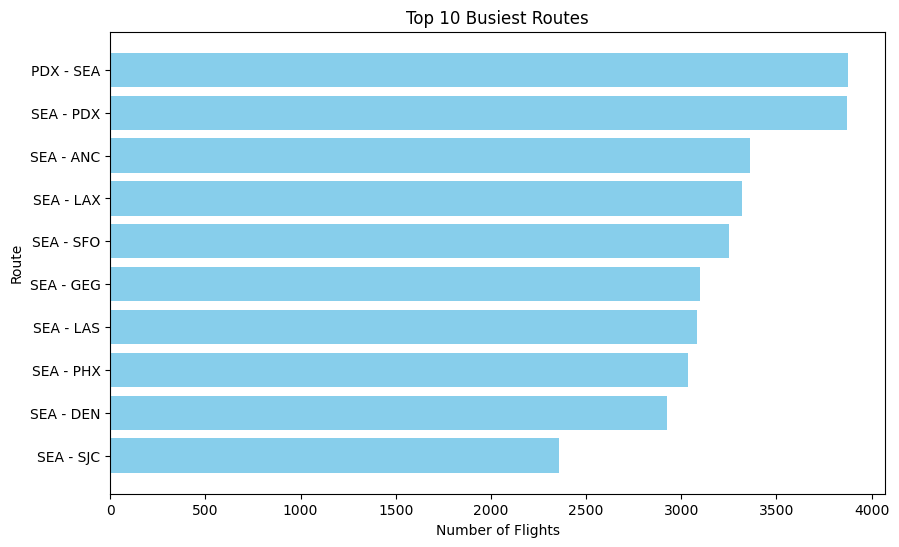

In [19]:
# ---- Visualizations ----
plt.figure(figsize=(10, 6))

# Plot busiest routes
plt.barh(busiest_routes['origin'] + ' - ' + busiest_routes['dest'], busiest_routes['flight_count'], color='skyblue')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.title('Top 10 Busiest Routes')
plt.gca().invert_yaxis()
plt.show()



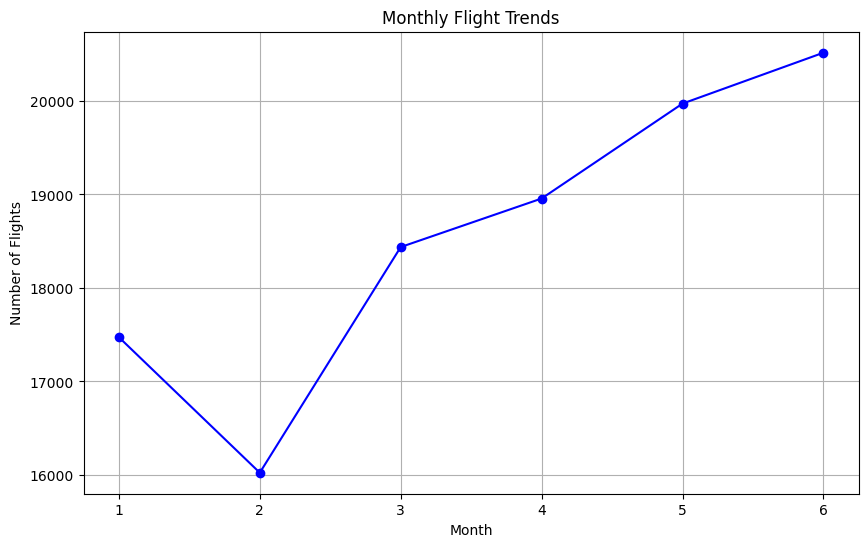

In [20]:
# Plot monthly trends
plt.figure(figsize=(10, 6))
plt.plot(flights_by_month['month'], flights_by_month['flight_count'], marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Monthly Flight Trends')
plt.grid()
plt.show()



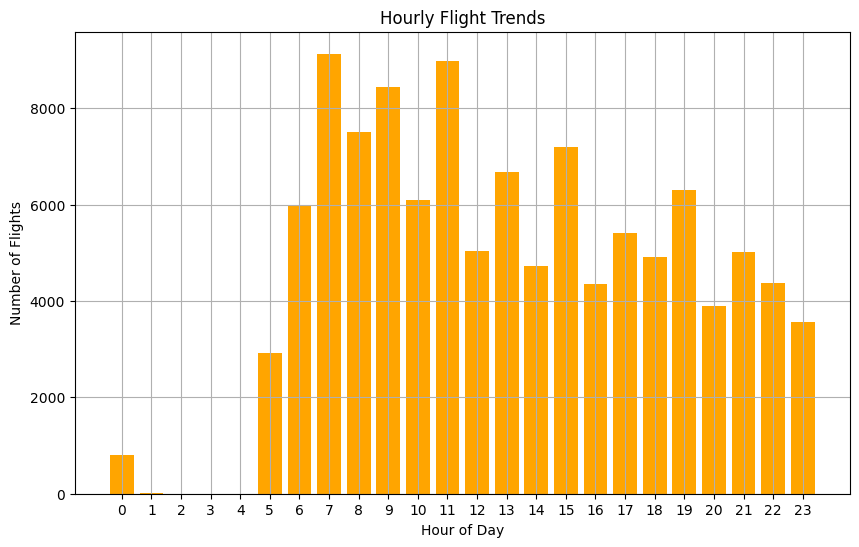

In [21]:
# Plot hourly trends
plt.figure(figsize=(10, 6))
plt.bar(flights_by_hour['hour'], flights_by_hour['flight_count'], color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.title('Hourly Flight Trends')
plt.xticks(range(0, 24))
plt.grid()
plt.show()



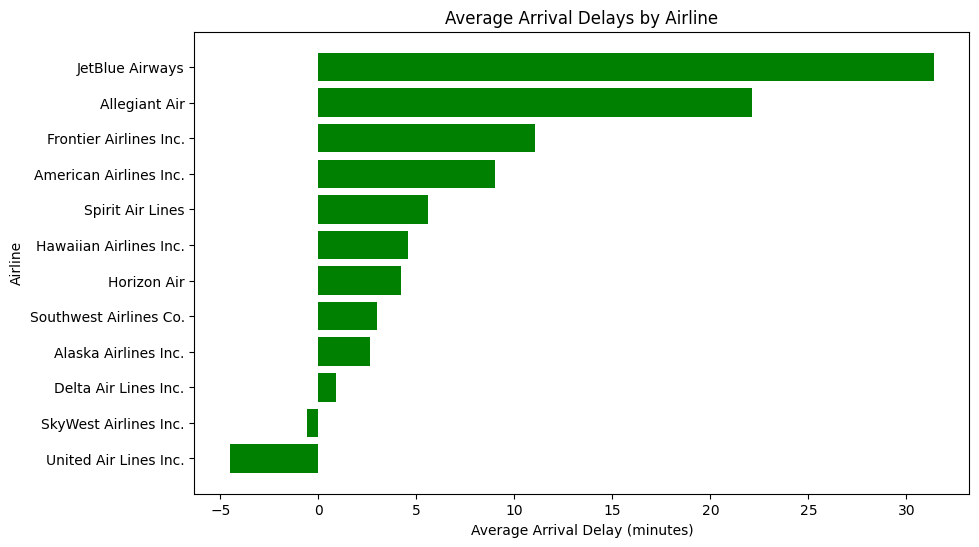

In [22]:
# Plot average delays by airline
plt.figure(figsize=(10, 6))
plt.barh(average_delays['airline'], average_delays['arr_delay'], color='green')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Airline')
plt.title('Average Arrival Delays by Airline')
plt.gca().invert_yaxis()
plt.show()



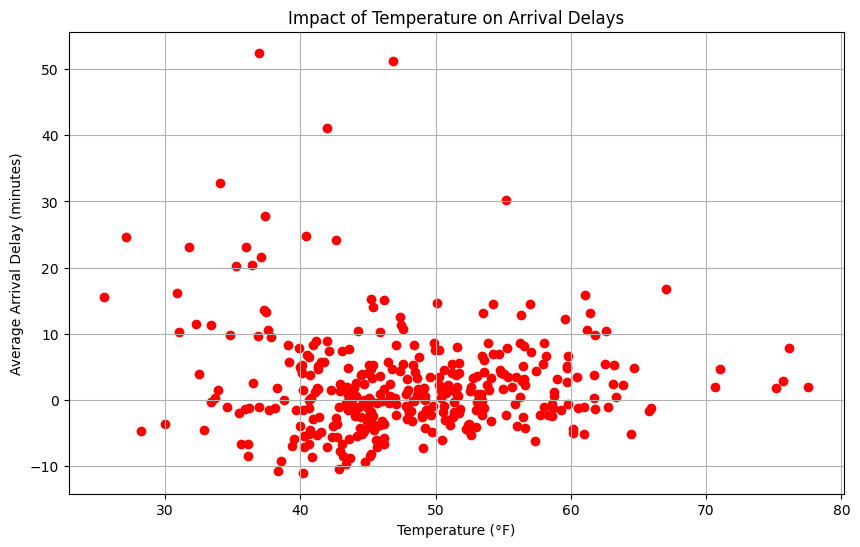

In [23]:
# Plot weather impact on delays
plt.figure(figsize=(10, 6))
plt.scatter(weather_impact['temp'], weather_impact['arr_delay'], color='red')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Impact of Temperature on Arrival Delays')
plt.grid()
plt.show()
